In [2]:
import ROOT
import math
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BASEDIR = '/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/'

In [55]:
b1k_mttbar = uproot.open(BASEDIR + 'b1k_mttbar.root')

### E matrix

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f6228458610>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f6228458a30>, text=[])

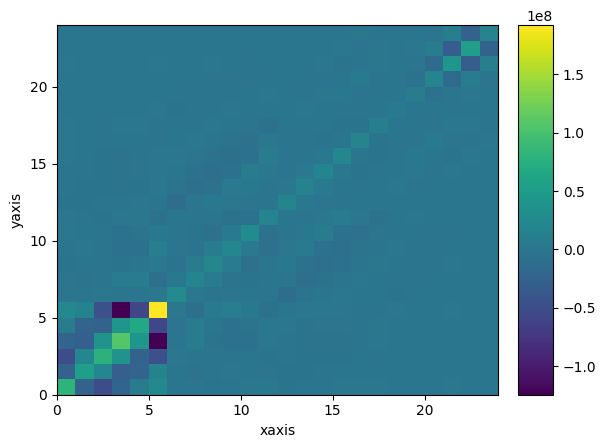

In [56]:
b1k_mttbarEmatrix = b1k_mttbar['b1k_mttbarEmatrix_rebinnedA'].to_numpy()[0]
b1k_mttbar['b1k_mttbarEmatrix_rebinnedA'].to_hist().plot()

### Corr matrix

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f6228309de0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f622830a200>, text=[])

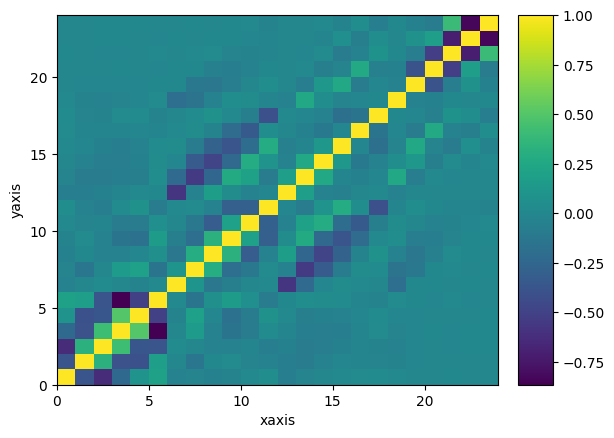

In [57]:
b1k_mttbarCorrmatrix = b1k_mttbar['b1k_mttbarCorrmatrix_rebinnedA'].to_numpy()[0]
b1k_mttbar['b1k_mttbarCorrmatrix_rebinnedA'].to_hist().plot()

In [58]:
# Extract diagnols
sigma_diag   = np.array([math.sqrt(b1k_mttbarEmatrix[i][i]) for i in range(24)])
sigma_matrix = np.zeros((24,24))

for i in range(24) : 
    sigma_matrix[i][i] = sigma_diag[i]

In [59]:
b1k_mttbar_Ematrix_from_corr = np.matmul(np.matmul(sigma_matrix, b1k_mttbarCorrmatrix), sigma_matrix.T)

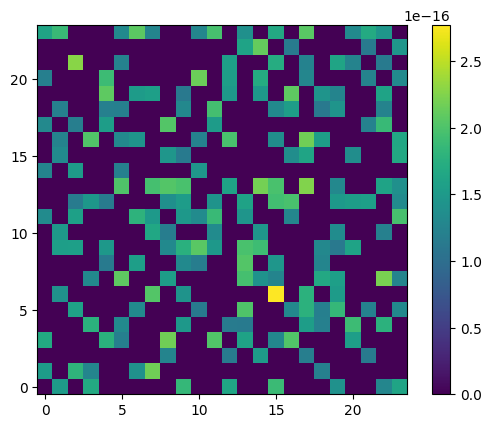

In [60]:
diff = b1k_mttbar_Ematrix_from_corr - b1k_mttbarEmatrix
rel_diff = diff/ (b1k_mttbarEmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

### Load in self corr matrix 100 PE

In [61]:
Corr_from_toys =  np.loadtxt('RhoBBCorrected_rebinnedA.txt')

In [62]:
b1k_mttbar_Corr_from_toys = Corr_from_toys[0:24, 0:24]
b1k_mttbar_Corr_from_toys

array([[ 1.00000000e+00, -2.27580776e-01, -6.48797339e-01,
        -3.77851374e-01,  3.06081366e-02,  2.96677842e-01,
        -1.06607197e-02,  1.90373063e-02, -3.95536652e-02,
         4.35434125e-02,  3.79198619e-02,  3.48731071e-03,
         1.43803417e-02, -5.29739341e-02,  1.21847535e-03,
        -7.40636891e-02,  8.13737797e-02, -9.38679940e-02,
         3.48427809e-02, -1.25036445e-01,  4.05325575e-02,
        -2.80591684e-02,  3.26087746e-02,  4.82032556e-02],
       [-2.27580776e-01,  1.00000000e+00,  3.39213135e-01,
        -4.04551024e-01, -5.97543495e-01,  1.83089036e-01,
        -7.14698035e-03, -1.65944815e-01, -1.00672493e-03,
         1.28100770e-01,  1.82773217e-02, -1.17942305e-01,
        -8.32543050e-03, -8.71613076e-02, -6.95207545e-03,
        -1.56203630e-01, -9.21236182e-02,  1.52248636e-01,
        -2.65029268e-02, -2.98154242e-02,  1.60278665e-02,
         1.13122784e-01, -7.51855936e-02, -2.28082487e-02],
       [-6.48797339e-01,  3.39213135e-01,  1.00000000e

In [63]:
b1k_mttbar_Ematrix_from_toys = np.matmul(np.matmul(sigma_matrix, b1k_mttbar_Corr_from_toys), sigma_matrix.T)

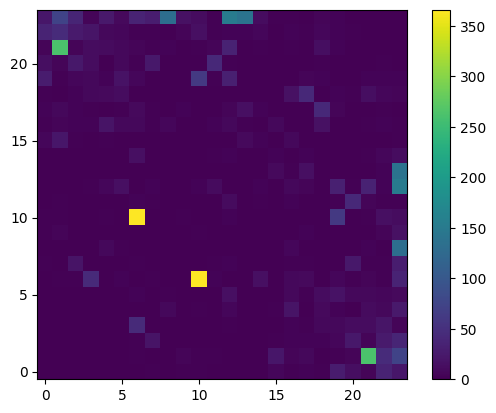

In [64]:
diff     = b1k_mttbar_Ematrix_from_toys - b1k_mttbarEmatrix
rel_diff = diff/ (b1k_mttbarEmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

In [68]:
np.round(b1k_mttbar_Corr_from_toys,6)

array([[ 1.00000e+00, -2.27581e-01, -6.48797e-01, -3.77851e-01,
         3.06080e-02,  2.96678e-01, -1.06610e-02,  1.90370e-02,
        -3.95540e-02,  4.35430e-02,  3.79200e-02,  3.48700e-03,
         1.43800e-02, -5.29740e-02,  1.21800e-03, -7.40640e-02,
         8.13740e-02, -9.38680e-02,  3.48430e-02, -1.25036e-01,
         4.05330e-02, -2.80590e-02,  3.26090e-02,  4.82030e-02],
       [-2.27581e-01,  1.00000e+00,  3.39213e-01, -4.04551e-01,
        -5.97543e-01,  1.83089e-01, -7.14700e-03, -1.65945e-01,
        -1.00700e-03,  1.28101e-01,  1.82770e-02, -1.17942e-01,
        -8.32500e-03, -8.71610e-02, -6.95200e-03, -1.56204e-01,
        -9.21240e-02,  1.52249e-01, -2.65030e-02, -2.98150e-02,
         1.60280e-02,  1.13123e-01, -7.51860e-02, -2.28080e-02],
       [-6.48797e-01,  3.39213e-01,  1.00000e+00,  5.53212e-01,
        -2.81144e-01, -5.40657e-01, -1.50000e-02, -9.77050e-02,
        -8.42810e-02, -7.10160e-02, -3.89850e-02, -8.77160e-02,
        -7.81580e-02, -5.21400e-03, -1

In [69]:
np.round(b1k_mttbarCorrmatrix,6)

array([[ 1.00000e+00, -3.81899e-01, -6.39622e-01, -2.38601e-01,
         9.38620e-02,  2.02362e-01, -4.37290e-02, -2.36820e-02,
        -5.17180e-02, -3.05200e-02,  9.83100e-03,  4.36660e-02,
        -7.27770e-02, -2.18310e-02,  7.37000e-04,  1.46280e-02,
         2.24760e-02,  2.95570e-02,  1.14460e-02, -4.23500e-03,
        -3.09200e-03,  7.80900e-03,  8.86000e-04, -2.34000e-03],
       [-3.81899e-01,  1.00000e+00,  3.26380e-01, -3.98210e-01,
        -4.04995e-01,  1.72852e-01, -2.88500e-03, -1.34590e-01,
         4.85200e-03,  2.27390e-02, -2.08030e-02, -4.13160e-02,
        -7.31070e-02, -9.84210e-02, -4.29580e-02, -6.56500e-03,
        -1.56290e-02, -2.24720e-02, -3.30490e-02, -8.81700e-03,
        -4.80000e-03,  4.31000e-04, -1.62400e-03,  3.16000e-04],
       [-6.39622e-01,  3.26380e-01,  1.00000e+00,  4.15987e-01,
        -3.63080e-01, -3.83618e-01,  2.44620e-02, -4.94200e-03,
        -4.46420e-02, -3.67180e-02, -1.64540e-02, -7.51680e-02,
        -5.21800e-02, -8.82380e-02, -7

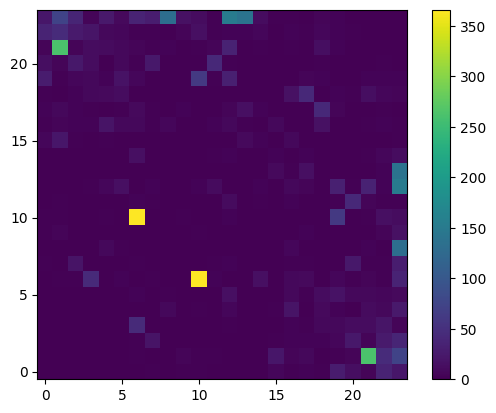

In [70]:
diff     = b1k_mttbar_Corr_from_toys - b1k_mttbarCorrmatrix
rel_diff = (b1k_mttbar_Corr_from_toys - b1k_mttbarCorrmatrix)/ (b1k_mttbarCorrmatrix)
plt.imshow(abs(rel_diff), origin='lower')
plt.colorbar()

In [71]:
1/math.sqrt(100)

0.1

In [74]:
diff[diff > 0.1]

array([0.15431842, 0.15431842, 0.10536129, 0.17472041, 0.11269206,
       0.13722559, 0.13872243, 0.15429666, 0.13722559, 0.21066052,
       0.14019972, 0.10101418, 0.15938023, 0.14019972, 0.10178725,
       0.10913217, 0.15350791, 0.10178725, 0.15350791, 0.14812612,
       0.12717308, 0.15007241, 0.10913217, 0.14812612, 0.13986099,
       0.2132641 , 0.12473512, 0.10536129, 0.12717308, 0.13986099,
       0.29662083, 0.106752  , 0.2132641 , 0.29662083, 0.13392664,
       0.13582539, 0.11742827, 0.13074004, 0.13392664, 0.11587394,
       0.10786849, 0.13170358, 0.10153312, 0.13582539, 0.11587394,
       0.1901424 , 0.13051488, 0.10786849, 0.10434537, 0.15003742,
       0.12620302, 0.13170358, 0.1901424 , 0.10434537, 0.40869132,
       0.1007299 , 0.10900831, 0.10101418, 0.15003742, 0.40869132,
       0.15938023, 0.11742827, 0.12620302, 0.1007299 , 0.10271016,
       0.19842913, 0.17472041, 0.13872243, 0.10016806, 0.15429666,
       0.21066052, 0.10016806, 0.11713862, 0.15007241, 0.12473

In [83]:
len(diff[diff > 0.1])/ len(diff)**2

0.1597222222222222